In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder as le, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set(style="whitegrid")
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')


--- First 5 Rows ---


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

--- Statistical Summary ---


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--- Missing Values ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


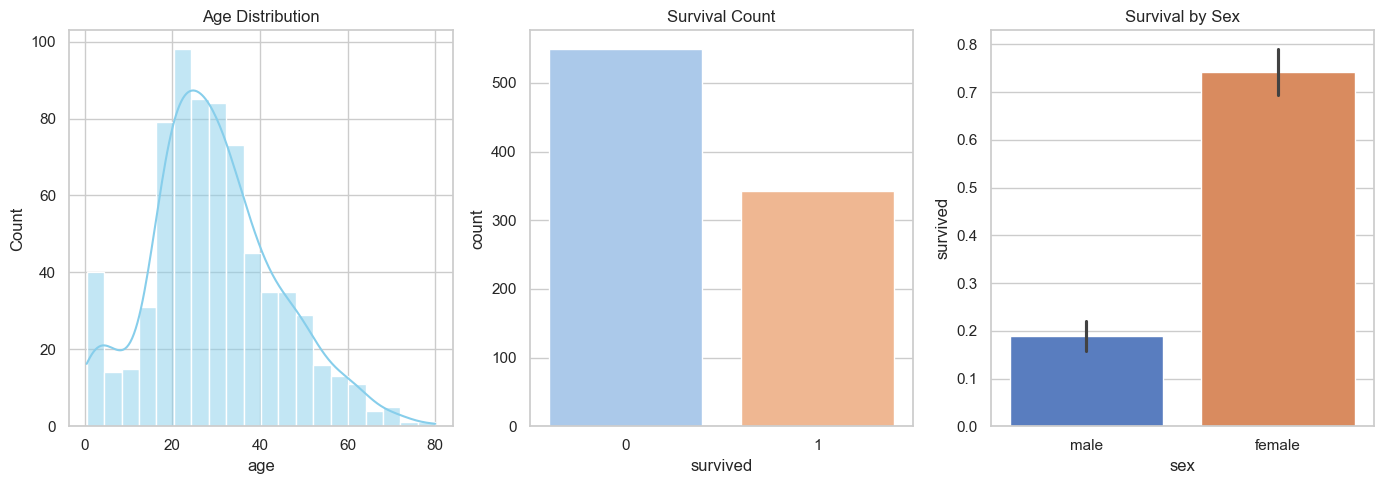

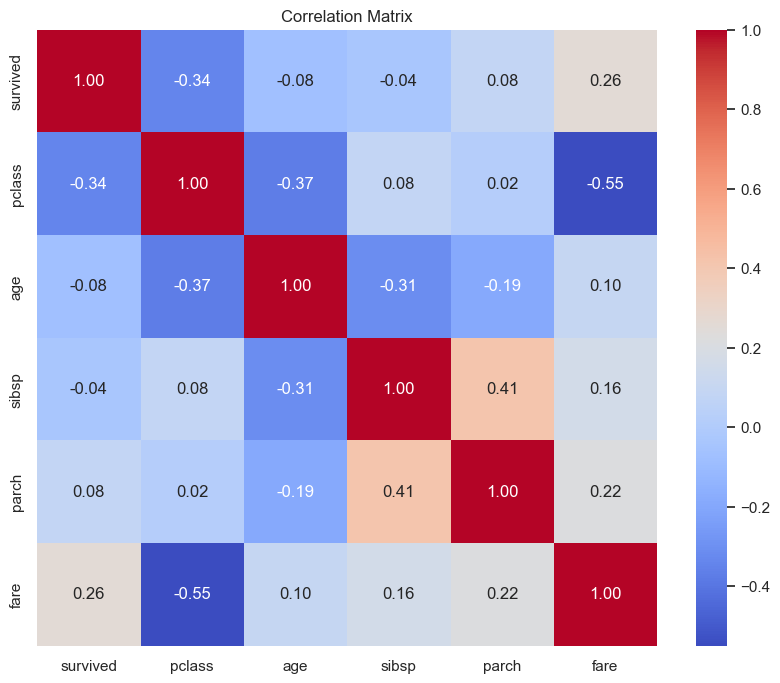

In [168]:
# 1- load dataset
df = sns.load_dataset('titanic')

# 2- EDA
print("\n--- First 5 Rows ---")
display(df)

print("\n--- Data Info ---")
print(df.info())

print("\n--- Statistical Summary ---")
display(df.describe())

# 3- missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 4- visualizations
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'].dropna(), kde=True, color='skyblue')
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Survival Count')

# for the correlation between the features and survival, 
# we deicided to use a correlation matrix and a barplot,
# matrix for the numerical values, and a barplot for "sex"
plt.subplot(1, 3, 3)
sns.barplot(x='sex', y='survived', data=df, palette='muted')
plt.title('Survival by Sex')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [169]:
# --- Data Cleaning

# fill age with median
df['age'] = df['age'].fillna(df['age'].median())

# fill "embarked" with mode most frequent category
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# 'embark_town': Duplicate of 'embarked'
df.drop('embark_town', axis=1, inplace=True)

# remove duplicates from all columns
print(f"Duplicates found: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# too many missing values on "deck" (wmore than 75%) so we drop it
df.drop('deck', axis=1, inplace=True)
# drop all redundant columns including class (duplicate of pclass but categorial so it's irrelevant)
df.drop(columns=['class', 'who', 'adult_male', 'alive'], inplace=True)

display(df.head())

Duplicates found: 110


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [170]:
# create FamilySize
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

# create IsAlone (1 if FamilySize is 1, else 0)
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# drop sibsp and parch (number of siblings and spouses, number of of parents and children)
# since they're irrelevant now due to FamilySize
df.drop(columns=['sibsp', 'parch'], inplace=True)

# familysize already gives all the information that isalone gives and more so i dont see why we need to keep it
df.drop('alone', axis=1, inplace=True)

df.head()

,survived,pclass,sex,age,fare,embarked,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,2,0
1,1,1,female,38.0,71.2833,C,2,0
2,1,3,female,26.0,7.9250,S,1,1
3,1,1,female,35.0,53.1000,S,2,0
4,0,3,male,35.0,8.0500,S,1,1


In [171]:
# Label Encoding for Binary 'sex' (male/female -> 1/0)
df['sex'] = le().fit_transform(df['sex'])

# One-Hot Encoding for 'embarked' (C, Q, S)
# drop_first=True since we know if both Q and S are false then its's C
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

display(df)

,survived,pclass,sex,age,fare,FamilySize,IsAlone,embarked_Q,embarked_S
0,0,3,1,22.0,7.2500,2,0,False,True
1,1,1,0,38.0,71.2833,2,0,False,False
2,1,3,0,26.0,7.9250,1,1,False,True
3,1,1,0,35.0,53.1000,2,0,False,True
4,0,3,1,35.0,8.0500,1,1,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,6,0,True,False
887,1,1,0,19.0,30.0000,1,1,False,True
888,0,3,0,28.0,23.4500,4,0,False,True
889,1,1,1,26.0,30.0000,1,1,False,False


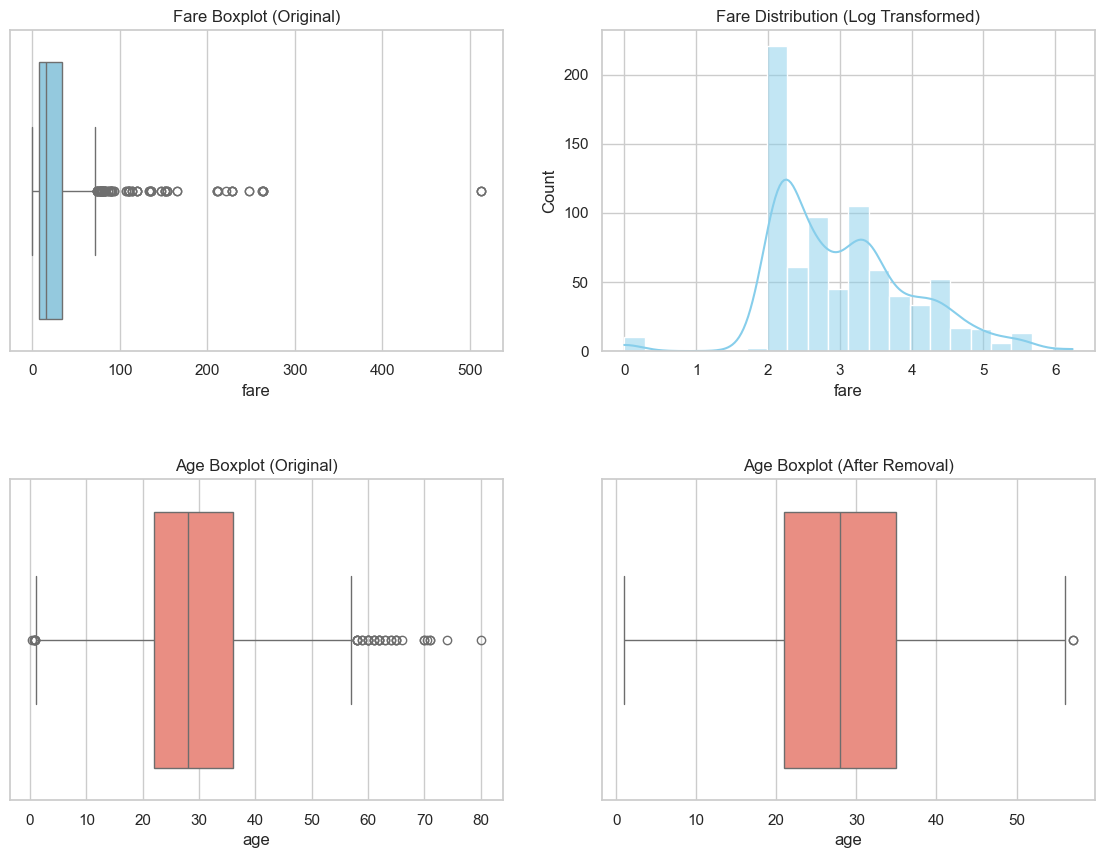

In [172]:
# --- Step 5: Outlier Handling

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# visualize Fare before
sns.boxplot(x=df['fare'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Fare Boxplot (Original)')

# handle Fare: Log Transformation
df['fare'] = np.log1p(df['fare'])

# visualize Fare after
sns.histplot(df['fare'], kde=True, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Fare Distribution (Log Transformed)')

# visualize Age before
sns.boxplot(x=df['age'], ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Age Boxplot (Original)')

# IQR on age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

initial_count = df.shape[0]
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
dropped_count = initial_count - df.shape[0]

# 3. Visualize Age AFTER
sns.boxplot(x=df['age'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Age Boxplot (After Removal)')

plt.show()

In [173]:
# Define Features (X) and Target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train Shape: {X_train_scaled.shape}")
print(f"Test Shape: {X_test_scaled.shape}")

Train Shape: (593, 8)
Test Shape: (149, 8)


In [174]:
# --- Model 1: Logistic Regression ---
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# --- Model 2: K-Nearest Neighbors ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [175]:
def print_evaluation(model_name, y_true, y_pred):
    print(f"================ {model_name} ================")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate Logistic Regression
print_evaluation("Logistic Regression", y_test, y_pred_log)

# Evaluate KNN
print_evaluation("K-Nearest Neighbors", y_test, y_pred_knn)

================ Logistic Regression ================
Accuracy: 0.7248

Confusion Matrix:
[[71 16]
 [25 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        87
           1       0.70      0.60      0.64        62

    accuracy                           0.72       149
   macro avg       0.72      0.71      0.71       149
weighted avg       0.72      0.72      0.72       149

================ K-Nearest Neighbors ================
Accuracy: 0.7383

Confusion Matrix:
[[74 13]
 [26 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        87
           1       0.73      0.58      0.65        62

    accuracy                           0.74       149
   macro avg       0.74      0.72      0.72       149
weighted avg       0.74      0.74      0.73       149



WHICH MODEL TO USE:
Between the two models, K-Nearest Neighbors shows slightly better performance with higher accuracy and stronger results compared to Logistic Regression, making it the better choice